In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks
import os


In [5]:
# CSV-Datei laden: Anpassen mit deinem Pfad

#Daten von Dominic einlesen
csv_Dominic_flach1 = r'c:\Arbeitsplatz\Studium_Innsbruck\Bewegungsanalyse\MGST_23_Bewegungsanalyse_LL_Doppelstock\Data\25_BewAn_Langlauf\Vogt,_Dominic/2025-04-23-16-44_IMU_BewAn_Langlauf_flach_hinzurück_1.csv'
csv_Dominic_flach2 = r'c:\Arbeitsplatz\Studium_Innsbruck\Bewegungsanalyse\MGST_23_Bewegungsanalyse_LL_Doppelstock\Data\25_BewAn_Langlauf\Vogt,_Dominic/2025-04-23-16-45_IMU_BewAn_Langlauf_flach_hinzurück_2.csv'

csv_Dominic_berg1 = r'c:\Arbeitsplatz\Studium_Innsbruck\Bewegungsanalyse\MGST_23_Bewegungsanalyse_LL_Doppelstock\Data\25_BewAn_Langlauf\Vogt,_Dominic/2025-04-23-16-42_IMU_BewAn_Langlauf_bergauf_1.csv'
csv_Dominic_berg2 = r'c:\Arbeitsplatz\Studium_Innsbruck\Bewegungsanalyse\MGST_23_Bewegungsanalyse_LL_Doppelstock\Data\25_BewAn_Langlauf\Vogt,_Dominic/2025-04-23-16-43_IMU_BewAn_Langlauf_bergauf_2.csv'


#Daten von Lennard einlesen
#siehe oben


#Daten vn Paul einlesen
#siehe oben


# Überprüfen, ob der Pfad zur Datei existiert
print(os.path.exists(csv_Dominic_flach1))


print(os.getcwd())

#Dataframe erstellen
# Die eigentlichen Datenzeilen beginnen ab Zeile 3 (Index 2), daher skiprows=2
df_dominic_flach1 = pd.read_csv(csv_Dominic_flach1, skiprows=3, sep=';', decimal=',')
df_dominic_flach2 = pd.read_csv(csv_Dominic_flach2, skiprows=3, sep=';', decimal=',')
df_dominic_berg1 = pd.read_csv(csv_Dominic_berg1, skiprows=3, sep=';', decimal=',')
df_dominic_berg2 = pd.read_csv(csv_Dominic_berg2, skiprows=3, sep=';', decimal=',')



True
c:\Arbeitsplatz\Studium_Innsbruck\Bewegungsanalyse\MGST_23_Bewegungsanalyse_LL_Doppelstock


C:\Users\Dominic Vogt\AppData\Local\Temp\ipykernel_3508\1161427576.py:27: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_dominic_flach1 = pd.read_csv(csv_Dominic_flach1, skiprows=3, sep=';', decimal=',')
C:\Users\Dominic Vogt\AppData\Local\Temp\ipykernel_3508\1161427576.py:28: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_dominic_flach2 = pd.read_csv(csv_Dominic_flach2, skiprows=3, sep=';', decimal=',')
C:\Users\Dominic Vogt\AppData\Local\Temp\ipykernel_3508\1161427576.py:29: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_dominic_berg1 = pd.read_csv(csv_Dominic_berg1, skiprows=3, sep=';', decimal=',')
C:\Users\Dominic Vogt\AppData\Local\Temp\ipykernel_3508\1161427576.py:30: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_dominic_berg2 = pd.read_csv(csv_Domin

In [6]:
#Daten zuschneiden um Störungen zu entfernen

# Von 0 bis 15 Sekunden
df_dominic_flach1_0_15 = df_dominic_flach1[(df_dominic_flach1["time"] >= 0) & (df_dominic_flach1["time"] <= 15)]

# Von 22 Sekunden bis zum Ende
df_dominic_flach1_22_end = df_dominic_flach1[df_dominic_flach1["time"] >= 22].reset_index(drop=True)

# Von 0 bis 15 Sekunden
df_dominic_flach1_0_15 = df_dominic_flach2[(df_dominic_flach2["time"] >= 0) & (df_dominic_flach2["time"] <= 15)]

# Von 22 Sekunden bis zum Ende
df_dominic_flach2_22_end = df_dominic_flach2[df_dominic_flach2["time"] >= 22].reset_index(drop=True)


In [7]:
# Hier kaann einer der in der oberen Zeilen definierten Dataframes verwendet werden um diesen in den nachfolgenden Zeilen zu plotten
# Dazu einfach den namen hier unten nach dem = Zeichen anpassen

testdf = df_dominic_flach2_22_end

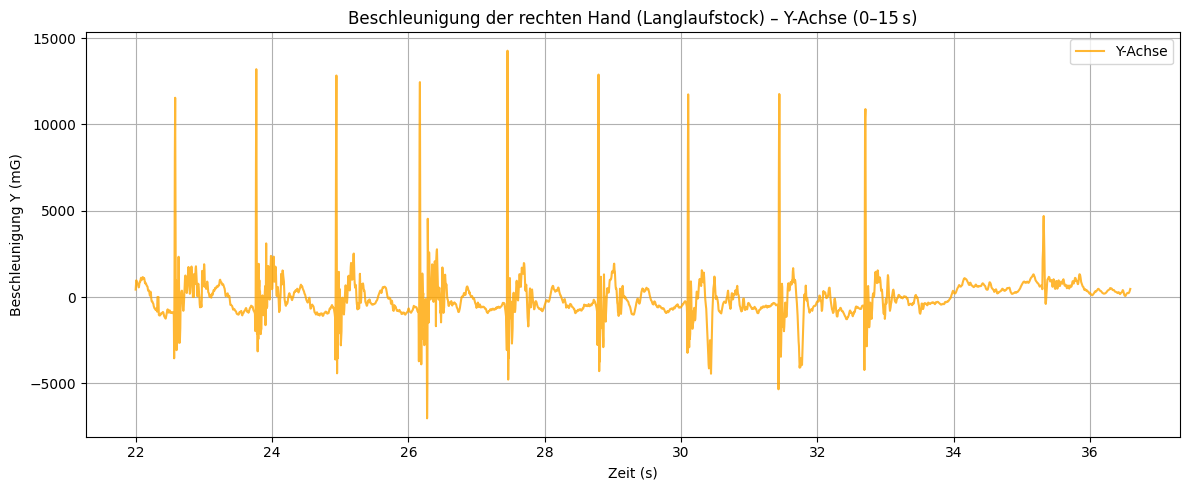

In [8]:
def plot_acceleration_y_axis(df, title_suffix=""):
    plt.figure(figsize=(12, 5))
    plt.plot(df["time"], df["RT Hand Accel Sensor Y (mG)"], label="Y-Achse", color="orange", alpha=0.8)
    plt.title(f"Beschleunigung der rechten Hand (Langlaufstock) – Y-Achse{title_suffix}")
    plt.xlabel("Zeit (s)")
    plt.ylabel("Beschleunigung Y (mG)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Beispiel-Aufruf:
plot_acceleration_y_axis(testdf, " (0–15 s)")

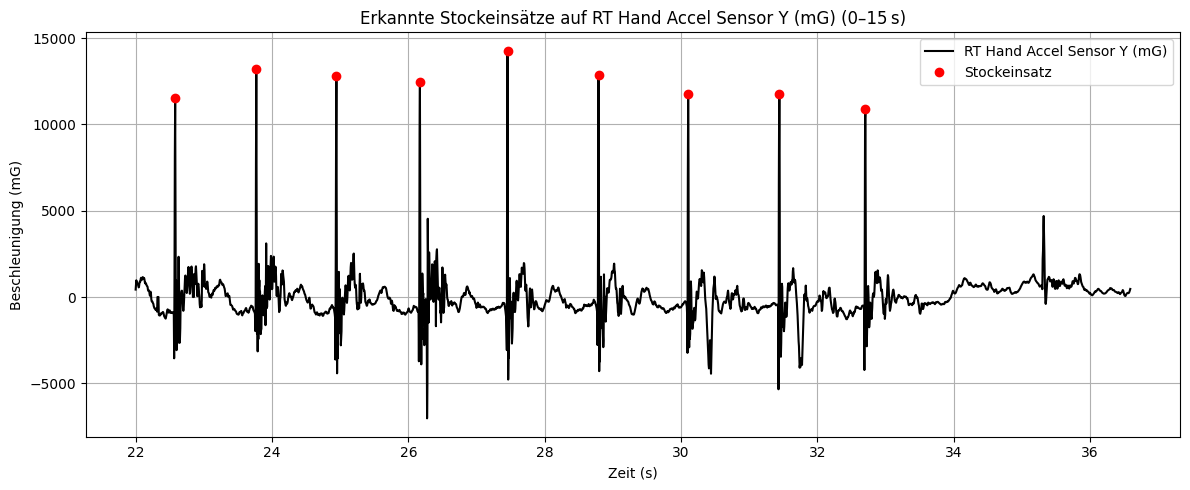

In [9]:
def plot_peaks_on_axis(df, axis_col, height=7000, distance=20, min_time_diff=0.5, title_suffix=""):
    # Peaks erkennen
    peaks, _ = find_peaks(df[axis_col], height=height, distance=distance)
    peak_times = df["time"].iloc[peaks].values

    # Peaks filtern: nur behalten, wenn Abstand zum vorherigen >= min_time_diff
    filtered_peaks = []
    last_time = -np.inf
    for idx, t in zip(peaks, peak_times):
        if t - last_time >= min_time_diff:
            filtered_peaks.append(idx)
            last_time = t
    filtered_peaks = np.array(filtered_peaks)

    # Neue Spalte im DataFrame: True bei Peak, sonst False
    df["is_peak"] = False
    df.loc[df.index[filtered_peaks], "is_peak"] = True

    # Plot mit Markierungen
    plt.figure(figsize=(12, 5))
    plt.plot(df["time"], df[axis_col], label=axis_col, color="black")
    plt.plot(df["time"].iloc[filtered_peaks], df[axis_col].iloc[filtered_peaks], "ro", label="Stockeinsatz")
    plt.title(f"Erkannte Stockeinsätze auf {axis_col}{title_suffix}")
    plt.xlabel("Zeit (s)")
    plt.ylabel("Beschleunigung (mG)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    return filtered_peaks

# Beispiel-Aufruf:
peaks = plot_peaks_on_axis(testdf, "RT Hand Accel Sensor Y (mG)", height=7000, distance=20, min_time_diff=0.5, title_suffix=" (0–15 s)")

In [10]:
def analyze_peaks(df):
    # Indizes der Peaks aus der Spalte 'is_peak'
    peaks = df.index[df["is_peak"] == True].to_numpy()
    peak_times = df.loc[peaks, "time"].values  # <-- .loc statt .iloc

    # Zeitabstände zwischen den Einschlägen berechnen
    time_differences = np.diff(peak_times)

    # Tabelle erstellen
    impact_df = pd.DataFrame({
        "Index": peaks,
        "Zeit (s)": peak_times
    })

    # Zeitabstände als eigene Spalte (letzter Wert NaN)
    impact_df["Δt zum nächsten Einschlag (s)"] = np.append(time_differences, np.nan)

    # Ausgabe
    print(impact_df)

    # Statistik berechnen
    mean_dt = np.mean(time_differences)
    std_dt = np.std(time_differences)

    # Schübe pro Minute berechnen
    if len(peaks) > 1:
        total_time = peak_times[-1] - peak_times[0]
        shoves_per_minute = len(peaks) / (total_time / 60) if total_time > 0 else np.nan
    else:
        shoves_per_minute = np.nan

    # Ausgabe der Berechnungen
    print(f"Mittelwert der Zeitabstände: {mean_dt:.3f} Sekunden")
    print(f"Standardabweichung der Zeitabstände: {std_dt:.3f} Sekunden")
    print(f"Schübe pro Minute: {shoves_per_minute:.2f}")

  

    return impact_df, mean_dt, std_dt, shoves_per_minute

# Beispiel-Aufruf:
impact_df, mean_dt, std_dt, shoves_per_minute = analyze_peaks(testdf)

   Index  Zeit (s)  Δt zum nächsten Einschlag (s)
0    116    22.580                          1.190
1    354    23.770                          1.175
2    589    24.945                          1.225
3    834    26.170                          1.285
4   1091    27.455                          1.335
5   1358    28.790                          1.315
6   1621    30.105                          1.335
7   1888    31.440                          1.265
8   2141    32.705                            NaN
Mittelwert der Zeitabstände: 1.266 Sekunden
Standardabweichung der Zeitabstände: 0.059 Sekunden
Schübe pro Minute: 53.33


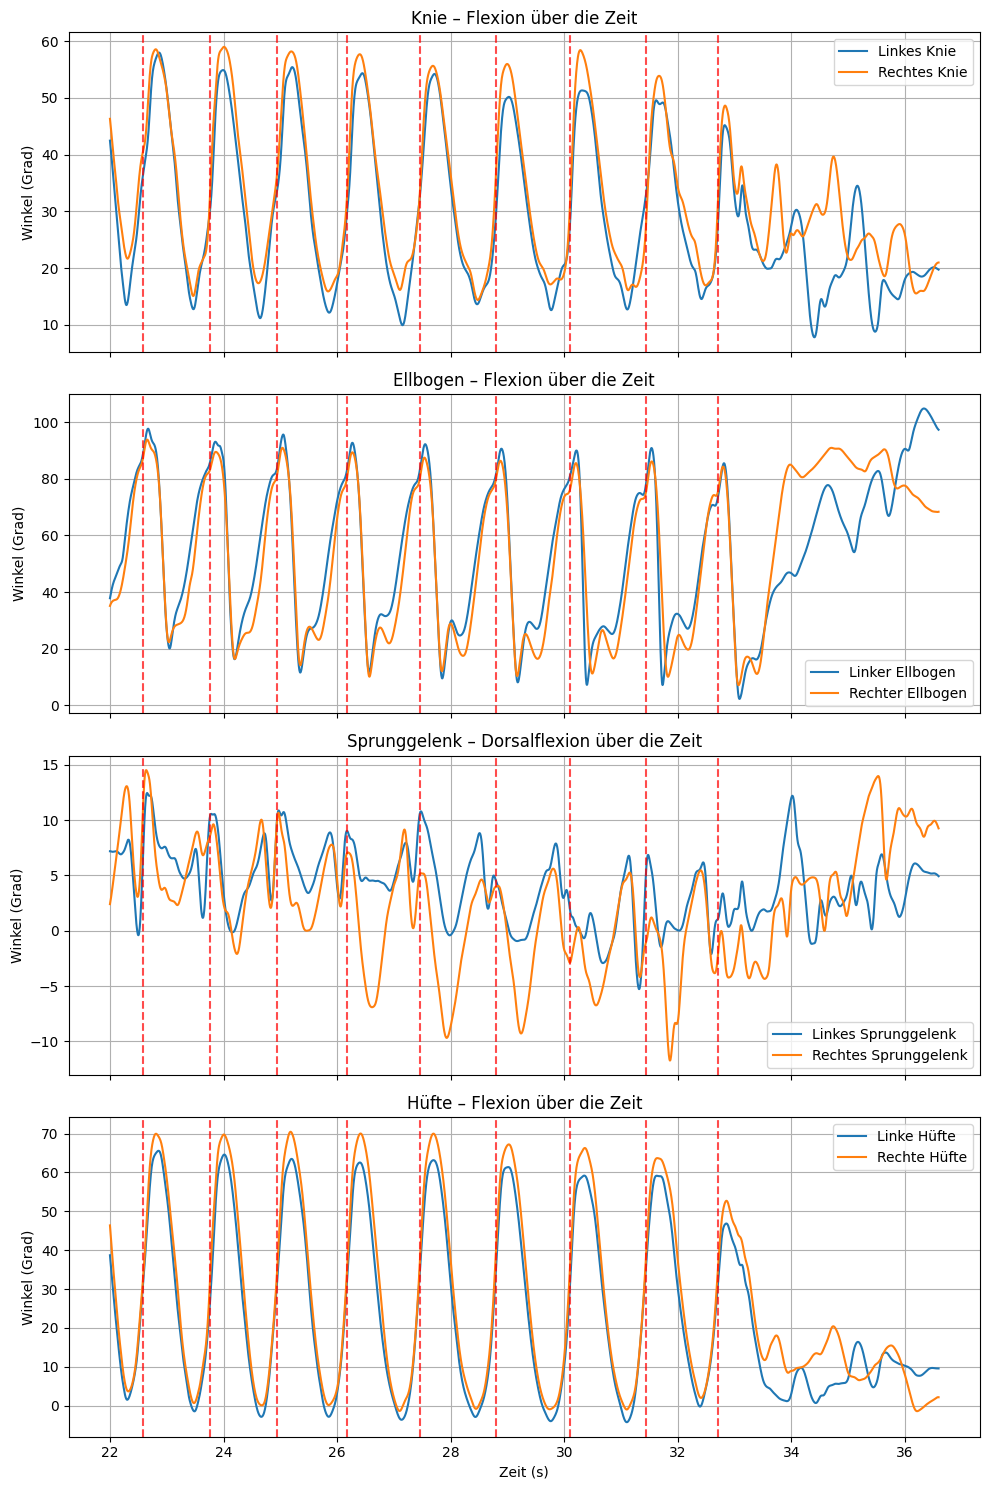

In [11]:
def plot_joint_angles_with_peaks(df):

    peaks = df.index[df["is_peak"] == True].to_numpy()
    peak_times = df.loc[peaks, "time"].values  # <-- .loc statt .iloc

    # Relevante Spalten für Hüfte, Knie, Ellbogen und Sprunggelenk (links und rechts)
    winkel_spalten = [
        'LT Hip Flexion (Grad)', 'RT Hip Flexion (Grad)',
        'LT Knee Flexion (Grad)', 'RT Knee Flexion (Grad)',
        'LT Elbow Flexion (Grad)', 'RT Elbow Flexion (Grad)',
        'LT Ankle Dorsiflexion (Grad)', 'RT Ankle Dorsiflexion (Grad)',
    ]
    winkel_df = df[winkel_spalten]

    # Falls keine peak_times übergeben: automatisch aus is_peak-Spalte holen
    if peak_times is None and "is_peak" in df.columns:
        peak_times = df.loc[df["is_peak"] == True, "time"].values

    fig, axes = plt.subplots(4, 1, figsize=(10, 15), sharex=True)

    # Knie
    axes[0].plot(df["time"], winkel_df['LT Knee Flexion (Grad)'], label='Linkes Knie')
    axes[0].plot(df["time"], winkel_df['RT Knee Flexion (Grad)'], label='Rechtes Knie')
    axes[0].set_title('Knie – Flexion über die Zeit')
    axes[0].set_ylabel('Winkel (Grad)')
    axes[0].legend()
    axes[0].grid()
    if peak_times is not None:
        for peak_time in peak_times:
            axes[0].axvline(x=peak_time, color='red', linestyle='--', alpha=0.7)

    # Ellbogen
    axes[1].plot(df["time"], winkel_df['LT Elbow Flexion (Grad)'], label='Linker Ellbogen')
    axes[1].plot(df["time"], winkel_df['RT Elbow Flexion (Grad)'], label='Rechter Ellbogen')
    axes[1].set_title('Ellbogen – Flexion über die Zeit')
    axes[1].set_ylabel('Winkel (Grad)')
    axes[1].legend()
    axes[1].grid()
    if peak_times is not None:
        for peak_time in peak_times:
            axes[1].axvline(x=peak_time, color='red', linestyle='--', alpha=0.7)

    # Sprunggelenk
    axes[2].plot(df["time"], winkel_df['LT Ankle Dorsiflexion (Grad)'], label='Linkes Sprunggelenk')
    axes[2].plot(df["time"], winkel_df['RT Ankle Dorsiflexion (Grad)'], label='Rechtes Sprunggelenk')
    axes[2].set_title('Sprunggelenk – Dorsalflexion über die Zeit')
    axes[2].set_ylabel('Winkel (Grad)')
    axes[2].legend()
    axes[2].grid()
    if peak_times is not None:
        for peak_time in peak_times:
            axes[2].axvline(x=peak_time, color='red', linestyle='--', alpha=0.7)

    # Hüfte
    axes[3].plot(df["time"], winkel_df['LT Hip Flexion (Grad)'], label='Linke Hüfte')
    axes[3].plot(df["time"], winkel_df['RT Hip Flexion (Grad)'], label='Rechte Hüfte')
    axes[3].set_title('Hüfte – Flexion über die Zeit')
    axes[3].set_xlabel('Zeit (s)')
    axes[3].set_ylabel('Winkel (Grad)')
    axes[3].legend()
    axes[3].grid()
    if peak_times is not None:
        for peak_time in peak_times:
            axes[3].axvline(x=peak_time, color='red', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()

# Beispiel-Aufruf:
plot_joint_angles_with_peaks(testdf)

In [ ]:
def berechne_max_min_rom(df):
    """
    Berechnet für jedes Intervall zwischen den Peaks die Min/Max/ROM-Werte für Knie, Hüfte, Ellbogen und Sprunggelenk.
    Erwartet Spaltennamen mit (Grad).
    """

    peaks = df.index[df["is_peak"] == True].to_numpy()
    peak_times = df.loc[peaks, "time"].values  # <-- .loc statt .iloc


    max_min_angles_rom = []
    for i in range(len(peaks)-1):
        start_idx = peaks[i]
        end_idx = peaks[i+1]
        interval_df = df.iloc[start_idx:end_idx]

        # Max und Min Werte für Knie, Hüfte, Ellbogen, Sprunggelenk (mit (Grad))
        knee_left_min = interval_df["LT Knee Flexion (Grad)"].min()
        knee_left_max = interval_df["LT Knee Flexion (Grad)"].max()
        knee_right_min = interval_df["RT Knee Flexion (Grad)"].min()
        knee_right_max = interval_df["RT Knee Flexion (Grad)"].max()

        hip_left_min = interval_df["LT Hip Flexion (Grad)"].min()
        hip_left_max = interval_df["LT Hip Flexion (Grad)"].max()
        hip_right_min = interval_df["RT Hip Flexion (Grad)"].min()
        hip_right_max = interval_df["RT Hip Flexion (Grad)"].max()

        elbow_left_min = interval_df["LT Elbow Flexion (Grad)"].min()
        elbow_left_max = interval_df["LT Elbow Flexion (Grad)"].max()
        elbow_right_min = interval_df["RT Elbow Flexion (Grad)"].min()
        elbow_right_max = interval_df["RT Elbow Flexion (Grad)"].max()

        ankle_left_min = interval_df["LT Ankle Dorsiflexion (Grad)"].min()
        ankle_left_max = interval_df["LT Ankle Dorsiflexion (Grad)"].max()
        ankle_right_min = interval_df["RT Ankle Dorsiflexion (Grad)"].min()
        ankle_right_max = interval_df["RT Ankle Dorsiflexion (Grad)"].max()

        # ROM für jedes Gelenk
        knee_left_rom = knee_left_max - knee_left_min
        knee_right_rom = knee_right_max - knee_right_min
        hip_left_rom = hip_left_max - hip_left_min
        hip_right_rom = hip_right_max - hip_right_min
        elbow_left_rom = elbow_left_max - elbow_left_min
        elbow_right_rom = elbow_right_max - elbow_right_min
        ankle_left_rom = ankle_left_max - ankle_left_min
        ankle_right_rom = ankle_right_max - ankle_right_min

        # Speichern der Ergebnisse in einer Liste

        max_min_angles_rom.append({
            "Knee Left Min": knee_left_min, "Knee Right Min": knee_right_min,
            "Knee Left Max": knee_left_max, "Knee Right Max": knee_right_max,
            "Knee Left ROM": knee_left_rom, "Knee Right ROM": knee_right_rom,

            "Hip Left Min": hip_left_min, "Hip Right Min": hip_right_min,
            "Hip Left Max": hip_left_max, "Hip Right Max": hip_right_max,
            "Hip Left ROM": hip_left_rom, "Hip Right ROM": hip_right_rom,

            "Elbow Left Min": elbow_left_min, "Elbow Right Min": elbow_right_min,
            "Elbow Left Max": elbow_left_max, "Elbow Right Max": elbow_right_max,
            "Elbow Left ROM": elbow_left_rom, "Elbow Right ROM": elbow_right_rom,

            "Ankle Left Min": ankle_left_min, "Ankle Right Min": ankle_right_min,
            "Ankle Left Max": ankle_left_max, "Ankle Right Max": ankle_right_max,
            "Ankle Left ROM": ankle_left_rom, "Ankle Right ROM": ankle_right_rom,
        })

    max_min_rom_df = pd.DataFrame(max_min_angles_rom)
    return max_min_rom_df

# Beispiel-Aufruf:
# kommentar muss einzeln gemacht werde
#max_min_rom_df = berechne_max_min_rom(testdf)

max_min_rom_df1 = berechne_max_min_rom(testdf)
max_min_rom_df = pd.concat([impact_df, max_min_rom_df1], axis=1)
print(max_min_rom_df)


   Index  Zeit (s)  Δt zum nächsten Einschlag (s)  Knee Left Min  \
0    116    22.580                          1.190      12.748507   
1    354    23.770                          1.175      11.169224   
2    589    24.945                          1.225      12.135062   
3    834    26.170                          1.285       9.931188   
4   1091    27.455                          1.335      13.618888   
5   1358    28.790                          1.315      12.581581   
6   1621    30.105                          1.335      12.703346   
7   1888    31.440                          1.265      14.537799   
8   2141    32.705                            NaN            NaN   

   Knee Right Min  Knee Left Max  Knee Right Max  Knee Left ROM  \
0       15.080132      57.996419       58.583470      45.247911   
1       17.325275      54.916955       59.012757      43.747731   
2       15.883517      55.434325       58.204049      43.299264   
3       16.149342      54.365160       57.705818   

In [27]:
def berechne_statistik_rom(df):
    """
    Berechnet Mittelwert und Standardabweichung für alle numerischen Spalten ab der dritten Spalte eines DataFrames.
    Gibt ein DataFrame mit Spaltenname, Mittelwert und Standardabweichung zurück.
    """
    numerische_spalten = df.columns[2:]  # Spalten ab der dritten Spalte
    durchschnittswerte = df[numerische_spalten].mean()
    standardabweichungen = df[numerische_spalten].std()

    statistik_df = pd.DataFrame({
        "Spalte": numerische_spalten,
        "Mittelwert": durchschnittswerte.values,
        "Standardabweichung": standardabweichungen.values
    })
    return statistik_df

# Beispiel-Aufruf:
statistik_df = berechne_statistik_rom(max_min_rom_df)
print(statistik_df)

                           Spalte  Mittelwert  Standardabweichung
0   Δt zum nächsten Einschlag (s)    1.265625            0.063270
1                   Knee Left Min   12.428199            1.413001
2                  Knee Right Min   16.121300            1.023569
3                   Knee Left Max   53.506668            2.885034
4                  Knee Right Max   57.187486            1.800016
5                   Knee Left ROM   41.078469            3.690770
6                  Knee Right ROM   41.066187            2.122330
7                    Hip Left Min   -2.765561            1.342774
8                   Hip Right Min   -0.141942            1.108515
9                    Hip Left Max   62.375984            2.348278
10                  Hip Right Max   68.409059            2.440611
11                   Hip Left ROM   65.141545            2.631568
12                  Hip Right ROM   68.551001            3.085550
13                 Elbow Left Min   11.440264            4.614712
14        

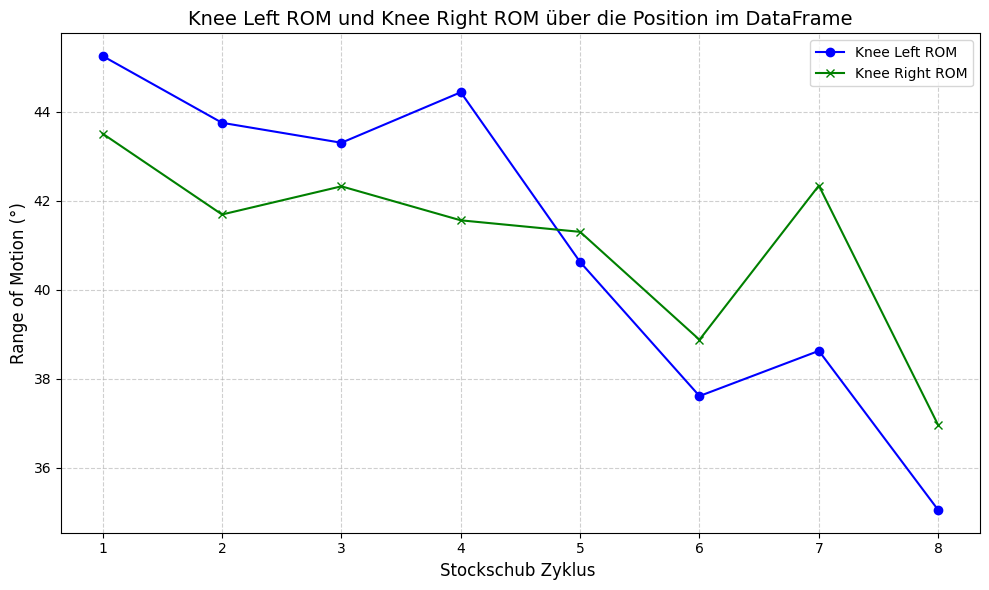

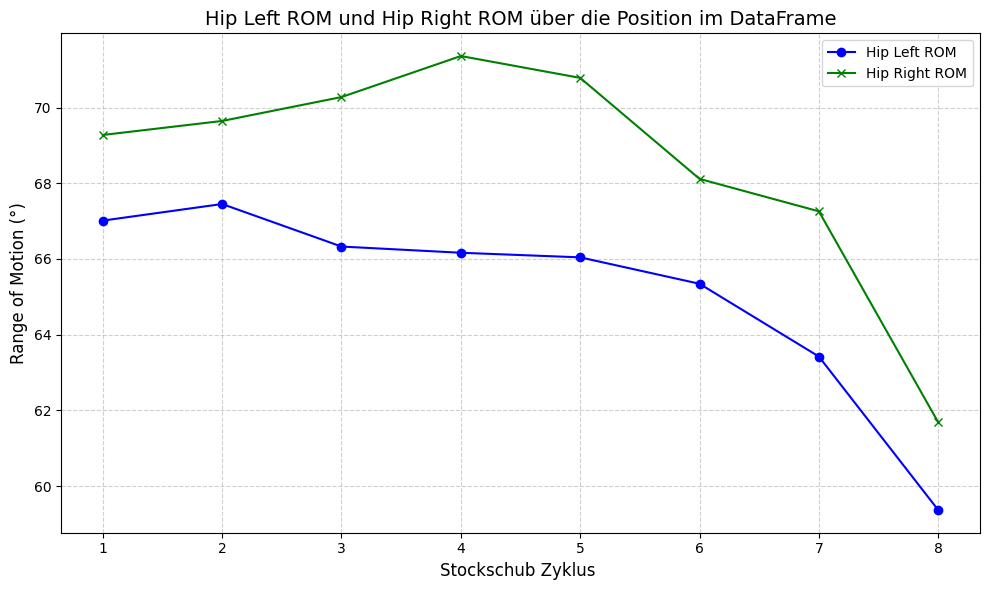

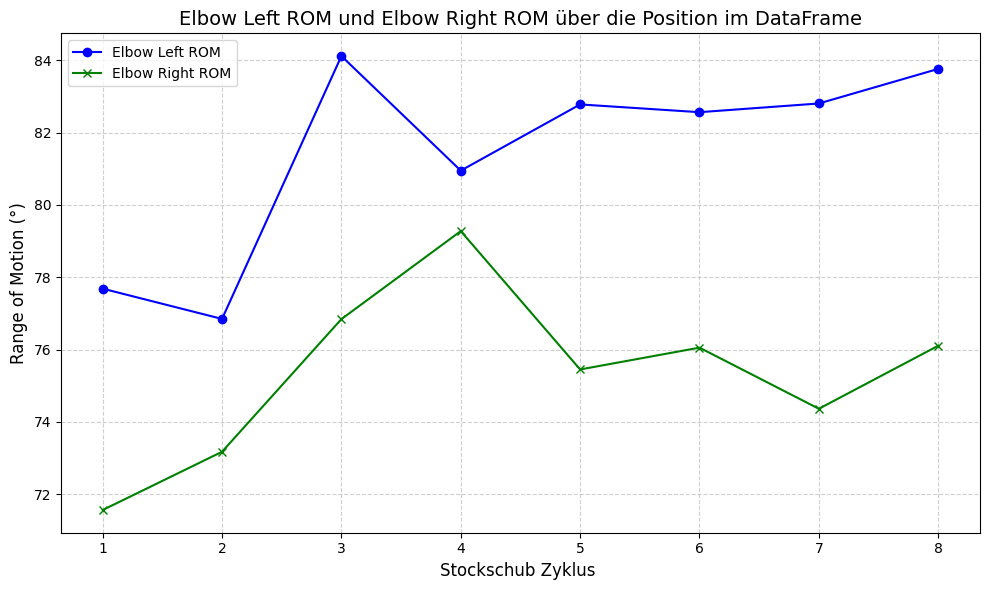

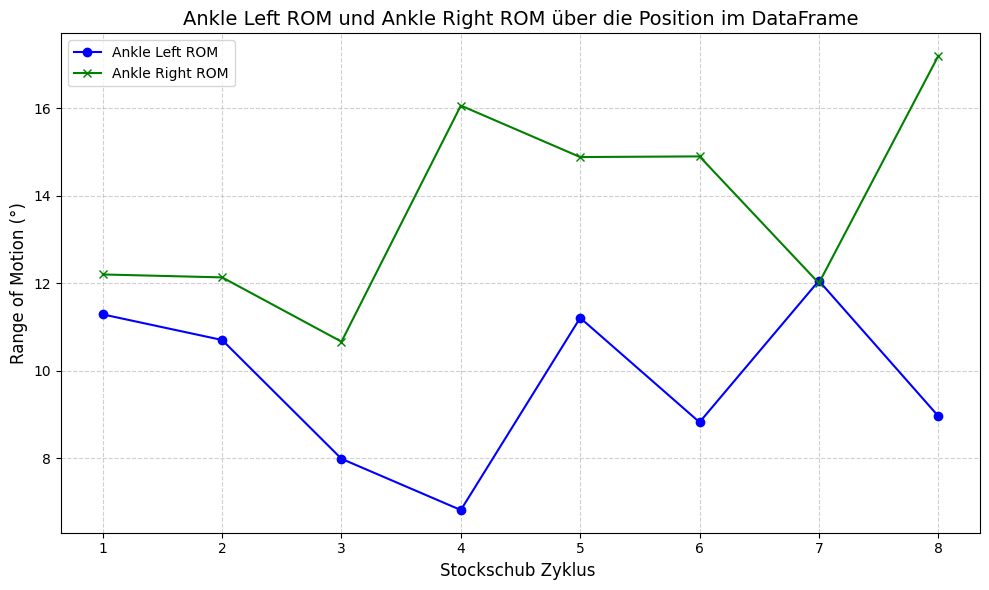

In [ ]:

def plot_rom_verlauf(df, spalte_links, spalte_rechts, title="ROM-Verlauf", ylabel="Range of Motion (°)"):
    """
    Plottet den Verlauf von zwei ROM-Spalten (z.B. links/rechts) über die Schub-Nummer (beginnend bei 1).
    """
    plt.figure(figsize=(10, 6))
    schuab_nummer = np.arange(1, len(df) + 1)  # Schub 1, 2, 3, ...
    plt.plot(schuab_nummer, df[spalte_links], label=spalte_links, color="blue", marker="o")
    plt.plot(schuab_nummer, df[spalte_rechts], label=spalte_rechts, color="green", marker="x")
    plt.title(title, fontsize=14)
    plt.xlabel("Stockschub Zyklus ", fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.show()

# Beispiel-Aufruf:
plot_rom_verlauf(max_min_rom_df, "Knee Left ROM", "Knee Right ROM", title="Knee Left ROM und Knee Right ROM über die Position im DataFrame")
plot_rom_verlauf(max_min_rom_df, "Hip Left ROM", "Hip Right ROM", title="Hip Left ROM und Hip Right ROM über die Position im DataFrame")
plot_rom_verlauf(max_min_rom_df, "Elbow Left ROM", "Elbow Right ROM", title="Elbow Left ROM und Elbow Right ROM über die Position im DataFrame")
plot_rom_verlauf(max_min_rom_df, "Ankle Left ROM", "Ankle Right ROM", title="Ankle Left ROM und Ankle Right ROM über die Position im DataFrame")


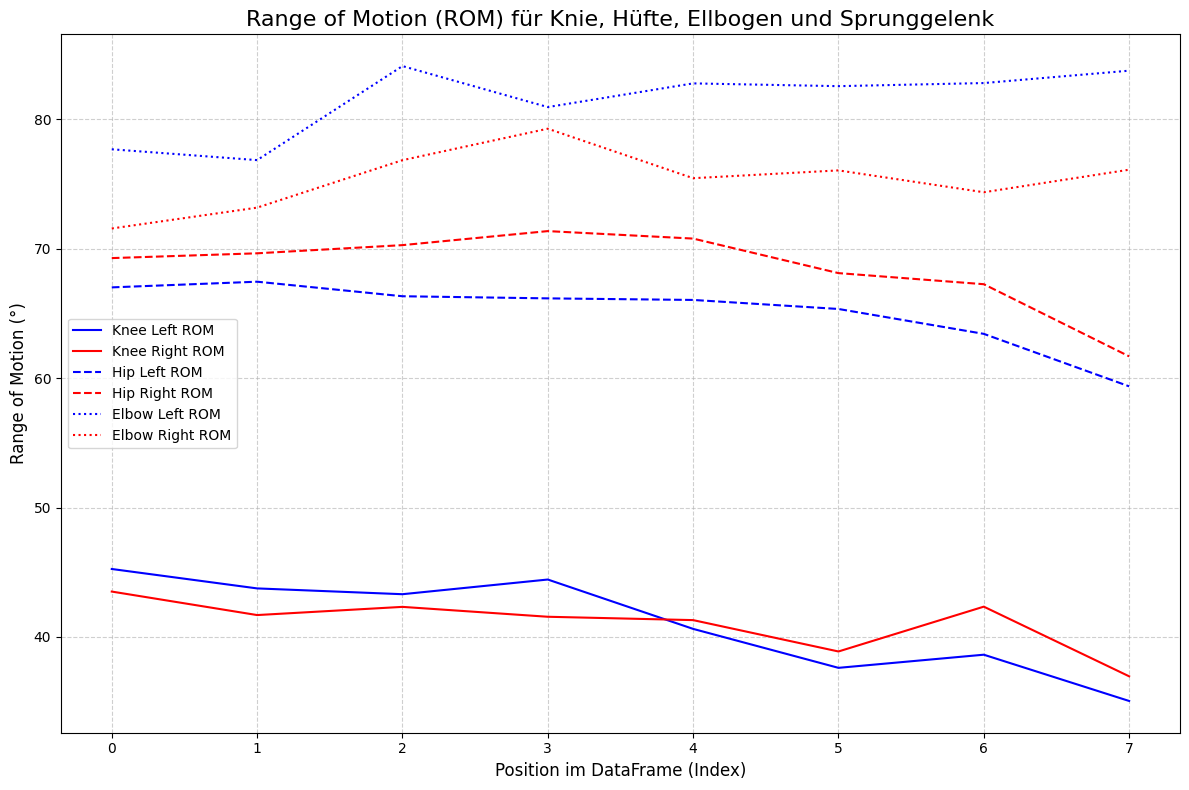

In [24]:
def plot_all_rom_verlauf(df, title="Range of Motion (ROM) für Knie, Hüfte, Ellbogen und Sprunggelenk", ylabel="Range of Motion (°)"):
    """
    Plottet den Verlauf aller ROM-Werte (Knie, Hüfte, Ellbogen, Sprunggelenk) über den DataFrame-Index.
    """
    plt.figure(figsize=(12, 8))

    # Knie
    plt.plot(df.index, df["Knee Left ROM"], label="Knee Left ROM", color="blue", linestyle="-")
    plt.plot(df.index, df["Knee Right ROM"], label="Knee Right ROM", color="red", linestyle="-")

    # Hüfte
    plt.plot(df.index, df["Hip Left ROM"], label="Hip Left ROM", color="blue", linestyle="--")
    plt.plot(df.index, df["Hip Right ROM"], label="Hip Right ROM", color="red", linestyle="--")

    # Ellbogen
    plt.plot(df.index, df["Elbow Left ROM"], label="Elbow Left ROM", color="blue", linestyle=":")
    plt.plot(df.index, df["Elbow Right ROM"], label="Elbow Right ROM", color="red", linestyle=":")

    # Sprunggelenk
    #plt.plot(df.index, df["Ankle Left ROM"], label="Ankle Left ROM", color="blue", linestyle="-.")
    #plt.plot(df.index, df["Ankle Right ROM"], label="Ankle Right ROM", color="red", linestyle="-.")

    plt.title(title, fontsize=16)
    plt.xlabel("Position im DataFrame (Index)", fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.show()

# Beispiel-Aufruf:
plot_all_rom_verlauf(max_min_rom_df)

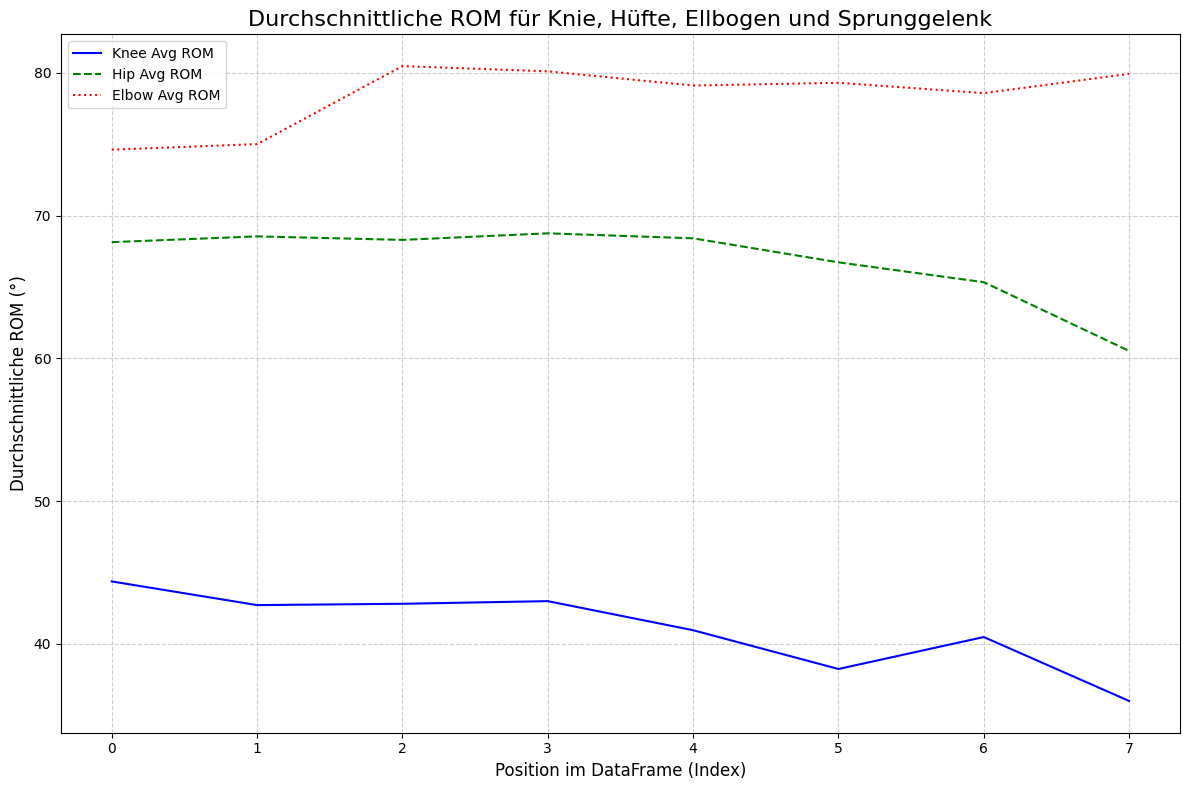

In [25]:
def plot_avg_rom_verlauf(df, title="Durchschnittliche ROM für Knie, Hüfte, Ellbogen und Sprunggelenk", ylabel="Durchschnittliche ROM (°)"):
    """
    Berechnet und plottet den Verlauf der durchschnittlichen ROM-Werte für Knie, Hüfte, Ellbogen und Sprunggelenk über den DataFrame-Index.
    Erwartet Spalten: 'Knee Left ROM', 'Knee Right ROM', 'Hip Left ROM', 'Hip Right ROM', 'Elbow Left ROM', 'Elbow Right ROM', 'Ankle Left ROM', 'Ankle Right ROM'
    """
    df = df.copy()
    df["Knee Avg ROM"] = (df["Knee Left ROM"] + df["Knee Right ROM"]) / 2
    df["Hip Avg ROM"] = (df["Hip Left ROM"] + df["Hip Right ROM"]) / 2
    df["Elbow Avg ROM"] = (df["Elbow Left ROM"] + df["Elbow Right ROM"]) / 2
    df["Ankle Avg ROM"] = (df["Ankle Left ROM"] + df["Ankle Right ROM"]) / 2

    plt.figure(figsize=(12, 8))
    plt.plot(df.index, df["Knee Avg ROM"], label="Knee Avg ROM", color="blue", linestyle="-")
    plt.plot(df.index, df["Hip Avg ROM"], label="Hip Avg ROM", color="green", linestyle="--")
    plt.plot(df.index, df["Elbow Avg ROM"], label="Elbow Avg ROM", color="red", linestyle=":")
    #plt.plot(df.index, df["Ankle Avg ROM"], label="Ankle Avg ROM", color="purple", linestyle="-.")
    plt.title(title, fontsize=16)
    plt.xlabel("Position im DataFrame (Index)", fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.show()

# Beispiel-Aufruf:
plot_avg_rom_verlauf(max_min_rom_df)

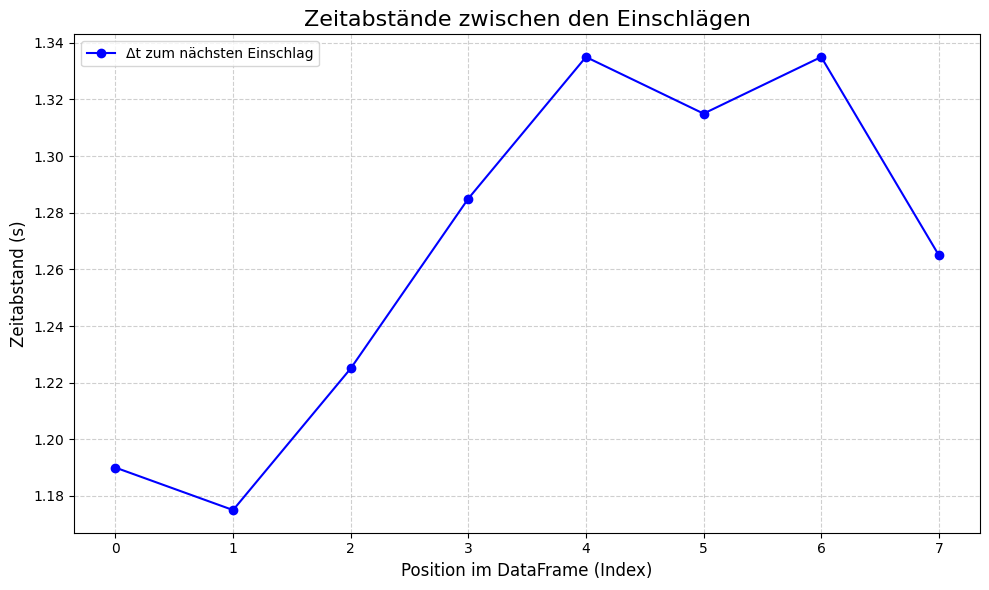

In [20]:
def plot_delta_t_impact(df, title="Zeitabstände zwischen den Einschlägen", ylabel="Zeitabstand (s)"):
    """
    Plottet die Zeitabstände (Δt) zwischen den Einschlägen über den DataFrame-Index.
    Erwartet eine Spalte 'Δt zum nächsten Einschlag (s)' im DataFrame.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(df.index, df["Δt zum nächsten Einschlag (s)"], label="Δt zum nächsten Einschlag", color="blue", marker="o")
    plt.title(title, fontsize=16)
    plt.xlabel("Position im DataFrame (Index)", fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.show()

# Beispiel-Aufruf:
plot_delta_t_impact(max_min_rom_df)